# PREDICT CAR PURCHASING DOLLAR AMOUNT USING ANNs (REGRESSION TASK)

## PROBLEM STATEMENT : 
From a Car Salesman's perspective, given following features, we need to predict the total amount that customers are willing to pay:
- Customer Name
- Customer Email
- Country
- Gender
- Age
- Annual Salary
- Credit Card Debt
- Net Worth

The model should predict:
- Car Purchase Amount

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from keras_tqdm import TQDMNotebookCallback
sns.set_style('dark')
warnings.filterwarnings('ignore')

## Reading Data


In [12]:
df = pd.read_csv("Car_Purchasing_Data.csv", encoding = 'latin1')

In [13]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Customer Name          500 non-null object
Customer e-mail        500 non-null object
Country                500 non-null object
Gender                 500 non-null int64
Age                    500 non-null float64
Annual Salary          500 non-null float64
Credit Card Debt       500 non-null float64
Net Worth              500 non-null float64
Car Purchase Amount    500 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.2+ KB


## Feature Analysis

### Age

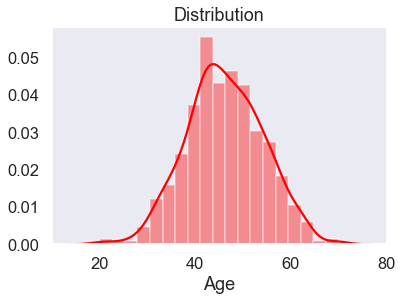

In [52]:
sns.set_context("talk")
sns.distplot(df['Age'], color = 'r')
plt.title("Distribution")
plt.show()

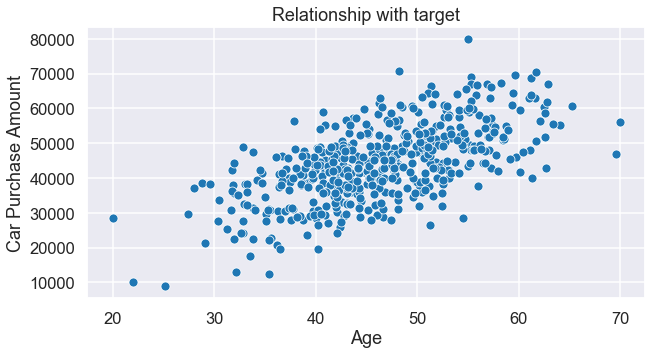

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ='Age', y = 'Car Purchase Amount', data=df)
plt.title('Relationship with target')
plt.grid()
plt.show()

Age is somewhat linearly related to the car Purchase Amount

### Annual Salary	

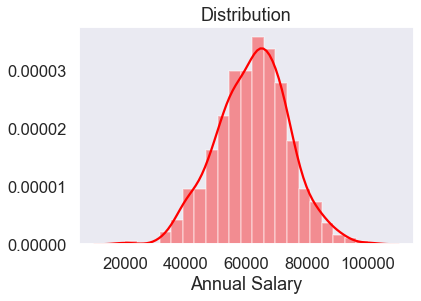

In [64]:
sns.distplot(df['Annual Salary'], color = 'r')
plt.title("Distribution")
plt.show()

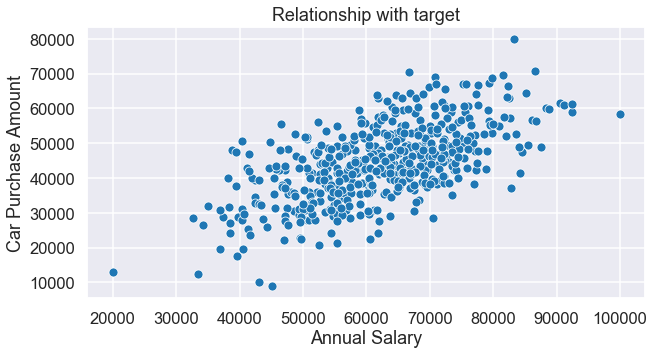

In [62]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ='Annual Salary', y = 'Car Purchase Amount', data=df)
plt.title('Relationship with target')
plt.grid()
plt.show()

Annual Salary is somewhat linearly related to Car Purchase Amount

### Credit Card Debt

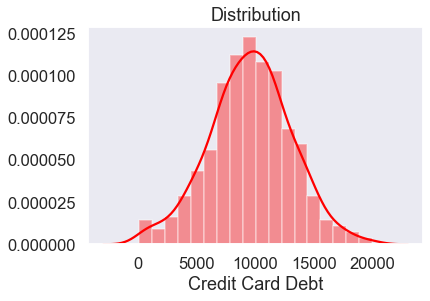

In [66]:
sns.distplot(df['Credit Card Debt'], color = 'r')
plt.title("Distribution")
plt.show()

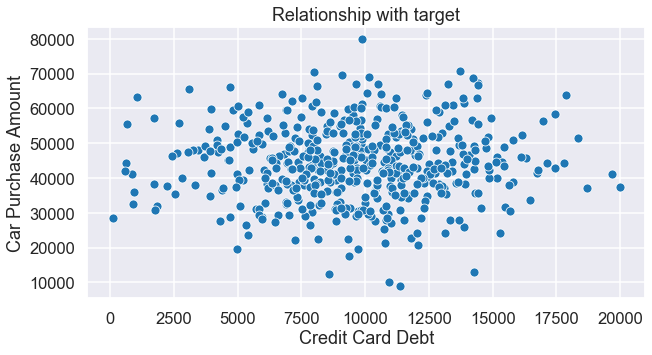

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ='Credit Card Debt', y = 'Car Purchase Amount', data=df)
plt.title('Relationship with target')
plt.grid()
plt.show()

Credit Card Debt doesnt show any linear relationship with the Car purchase Amount

### Net Worth

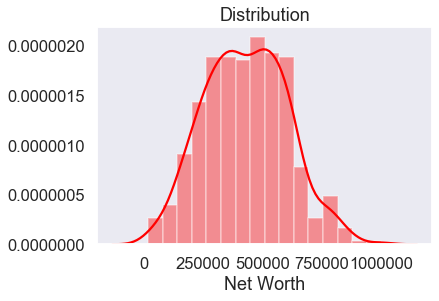

In [70]:
sns.distplot(df['Net Worth'], color = 'r')
plt.title("Distribution")
plt.show()

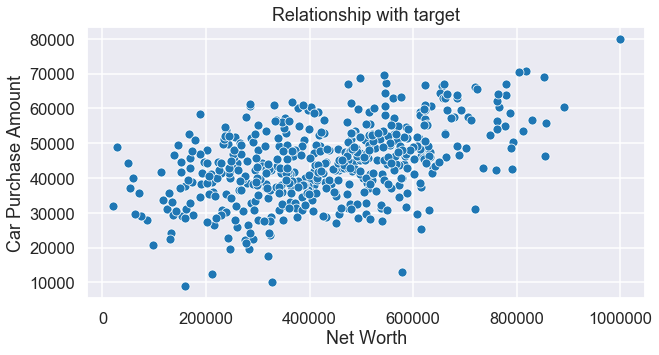

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ='Net Worth', y = 'Car Purchase Amount', data=df)
plt.title('Relationship with target')
plt.grid()
plt.show()

Net Worth has some linear relationship with Car Purchase Amount

### Correlation of Features with Target

In [88]:
x = df[['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']].corr()

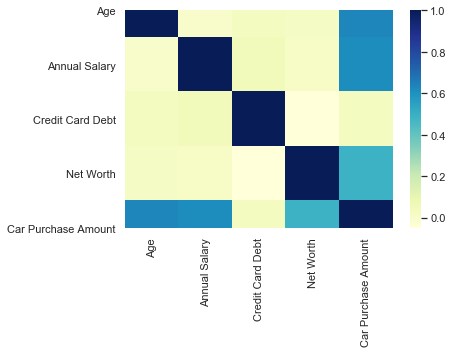

In [102]:
sns.set_context("notebook")
sns.heatmap(x, cmap="YlGnBu")
plt.show()

As we can see the target Amount is highly correlated with Age, Annual Salary and Net Worth. 

## Data Modeling

In [117]:
X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis =1)
y = df['Car Purchase Amount']

In [113]:
print(X.shape)
print(y.shape)

(500, 5)
(500,)


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [119]:

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

## Model Training

In [121]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [126]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 5)
(350, 1)
(150, 5)
(150, 1)


In [129]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense 

In [226]:
model = Sequential()
model.add(Dense(25, input_dim = 5, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation = 'linear'))


In [227]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_23 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [228]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [229]:
epochs_hist = model.fit(X_train, y_train, epochs=10, batch_size = 5, verbose=1, validation_split=0.3)

Train on 244 samples, validate on 106 samples
Epoch 1/10
244/244 [==============================] - ETA: 22s - loss: 0.41 - ETA: 1s - loss: 0.3052 - ETA: 0s - loss: 0.187 - ETA: 0s - loss: 0.130 - 1s 3ms/step - loss: 0.1174 - val_loss: 0.0161
Epoch 2/10
244/244 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.016 - 0s 841us/step - loss: 0.0163 - val_loss: 0.0101
Epoch 3/10
244/244 [==============================] - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.012 - 0s 831us/step - loss: 0.0129 - val_loss: 0.0083
Epoch 4/10
244/244 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - 0s 831us/step - loss: 0.0102 - val_loss: 0.0056
Epoch 5/10
244/244 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.006 - 0s 856us/step

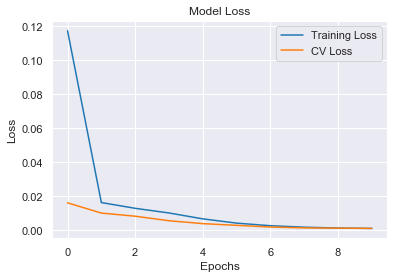

In [231]:
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

## Model Evaluation

In [241]:
from sklearn.metrics import mean_squared_error

In [234]:
y_pred = model.predict(X_test)

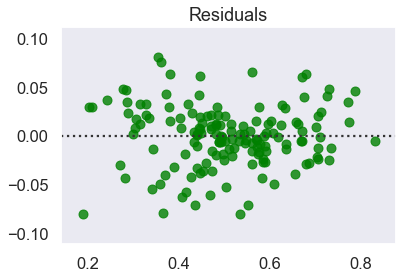

In [244]:
sns.set_context("talk")
sns.residplot(y_pred, y_test,  color = 'g' )
plt.title("Residuals")
plt.show()

In [245]:
print("Mean Squared Error on Test Data : ", mean_squared_error(y_pred, y_test))

Mean Squared Error on Test Data :  0.0016964833069418536
